### 

In [6]:
import pandas as pd

df = pd.read_csv('../data/train.csv')
df.head(20)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,20120503012628Z,"""Yeah and where are you now?"""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."


Insult
0    2898
1    1049
Name: count, dtype: int64


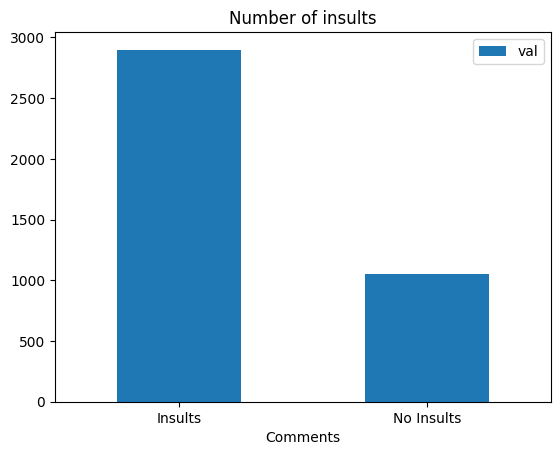

In [7]:
# from Insults, show me how many 1 and 0 i have
num = df['Insult'].value_counts()

print(num)

plot = pd.DataFrame({'Comments':['Insults', 'No Insults'], 'val':[num[0], num[1]]})
ax = plot.plot.bar(title='Number of insults',x='Comments', y='val', rot=0)


In [8]:
df_1 = df.dropna()
df_clean = df_1.query('Insult!=0')
df_clean.head(20)


,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."
15,1,20120611090207Z,"""FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ..."
16,1,20120320162532Z,"""You with the 'racist' screen name\n\nYou are ..."
18,1,20120320075347Z,"""your such a dickhead..."""
19,1,20120320203947Z,"""Your a retard go post your head up your #%&*"""
34,1,20120515132156Z,"""Allinit123, your\xa0hypocrisy\xa0is sickening..."
37,1,20120620161958Z,"""I can't believe the stupid people on this sit..."
38,1,20120609163743Z,"""fucking behave then you prick!"""


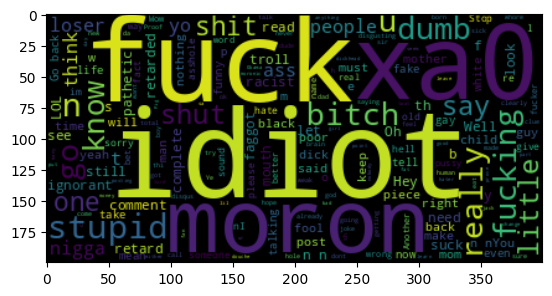

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df_clean['Comment'].to_string(index=False)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download the required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize the text
tokens = word_tokenize(text)

# Lowercase the tokens
tokens = [token.lower() for token in tokens]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

# Stem the tokens
stemmer = PorterStemmer()
tokens = [stemmer.stem(token) for token in tokens]

# Print the processed tokens
print(tokens)

['``', 'you', 'fuck', 'your', 'dad', '.', "''", '``', 'either', 'you', 'are', 'fake', 'or', 'extrem', 'stupid', '...', 'mayb', '...', "''", 'that', 'you', 'are', 'an', 'idiot', 'who', 'understand', 'neither', '...', "''", 'for', 'some', 'reason', 'u', 'sound', 'retard', '.', 'lol', '.', 'damn', '.', 'w', '...', "''", 'you', 'with', 'the', "'racist", "'", 'screen', 'name\\n\\ny', 'are', 'a', '...', '``', 'your', 'such', 'a', 'dickhead', '...', "''", '``', 'your', 'a', 'retard', 'go', 'post', 'your', 'head', 'up', 'your', '#', '%', '&', '*', "''", "''", 'allinit123', ',', 'your\\xa0hypocrisy\\xa0i', 'sicken', ',', '...', "''", 'i', 'ca', "n't", 'believ', 'the', 'stupid', 'peopl', 'on', 'thi', 'site', '...', '``', 'fuck', 'behav', 'then', 'you', 'prick', '!', "''", '``', 'is', 'that', 'it', '?', '?', 'your', 'sum', 'total', 'to', 'ani', 'conversati', '...', '``', 'faggot', "''", "''", 'aimless', 'abe', 'you', 'are', 'a', 'delus', 'weirdo', 'that', 'sho', '...', '``', 'even', 'as', 'a', 't

[nltk_data] Downloading package punkt to /home/zizou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zizou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/zizou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
